# 10 SUPPORT VECTOR MACHINE 

### Dataset Selection:
- Data set Description described in another document “Drug Response Classification”


#### Task 1: Exploratory Data Analysis (EDA)
- 1.	Load the dataset and perform fundamental data exploration.

In [71]:
import pandas as pd #import Libraries 
import numpy as np
df = pd.read_csv('Pharma_Industry.csv') #Load dataset
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [72]:
df.shape #Shape Of Dataset

(500, 6)

In [73]:
df.info() #info Of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [74]:
df.describe().T #Statistical information of dataset

,count,mean,std,min,25%,50%,75%,max
Drug Dosage (mg),500.0,-0.037761,0.979891,-3.019512,-0.642003,-0.019340,0.641151,2.949094
Systolic Blood Pressure (mmHg),500.0,0.214957,1.247567,-3.773897,-0.565168,0.201532,0.951375,4.111751
Heart Rate (BPM),500.0,0.062871,0.971978,-2.940389,-0.648157,0.027732,0.710774,3.193108
Liver Toxicity Index (U/L),500.0,0.054398,0.986001,-3.401277,-0.586085,-0.065661,0.633914,3.373269
Blood Glucose Level (mg/dL),500.0,-0.171863,0.983765,-3.110431,-0.797715,-0.108106,0.513555,2.518023
Drug Response,500.0,0.520000,0.500100,0.000000,0.000000,1.000000,1.000000,1.000000


In [75]:
df.isnull().sum() #Check Null Values

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [76]:
df.duplicated().sum() #Check Duplicates

0

- 2.	Utilize histograms, box plots, or density plots to understand feature distributions.

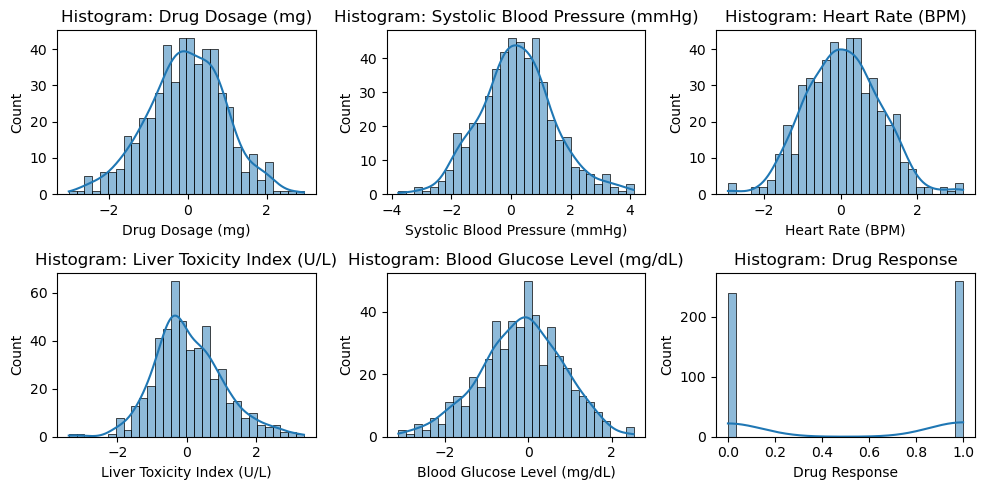

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=[np.number]).columns.tolist() #Find Numerical Columns 
plt.figure(figsize=(10,5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3, i)
    sns.histplot(df[col], kde=True, bins=30) #Plot Histplot Of Each Numerical Columns TO identify Features Distributions
    plt.title(f"Histogram: {col}")
plt.tight_layout()
plt.show()

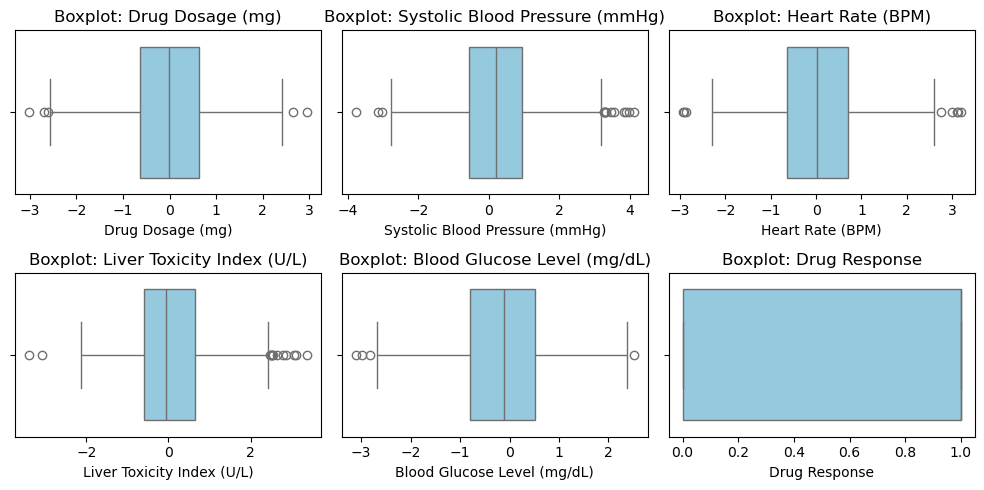

In [78]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color="skyblue")  #Plot Boxplot For Outlier Detection 
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

- 3.	Investigate feature correlations to discern relationships within the data.

In [79]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 -Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # df = df[(df[col] > lower_bound) | (df[col] < upper_bound)]
    df[col] = df[col].apply(lambda x: max(min(x, upper_bound),lower_bound)) #Capping For Handel Outliers 

df.shape

(500, 6)

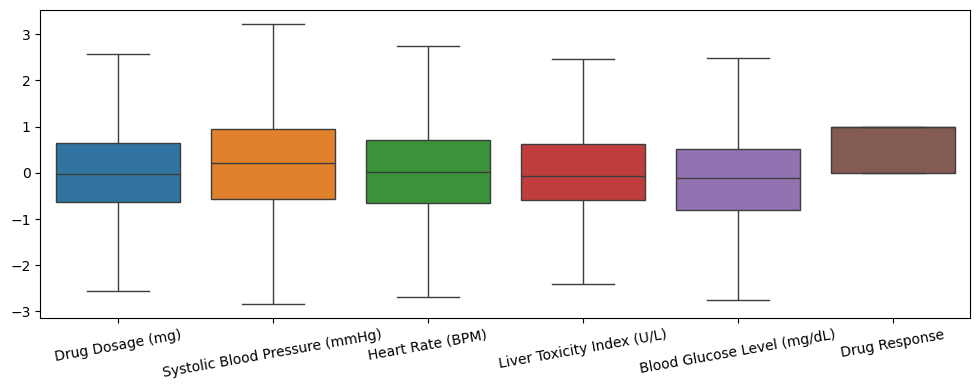

In [80]:
plt.figure(figsize = (12,4))
sns.boxplot(df) #Check Outliers Again 
plt.xticks(fontsize=10, rotation=10)
plt.show()

<Axes: >

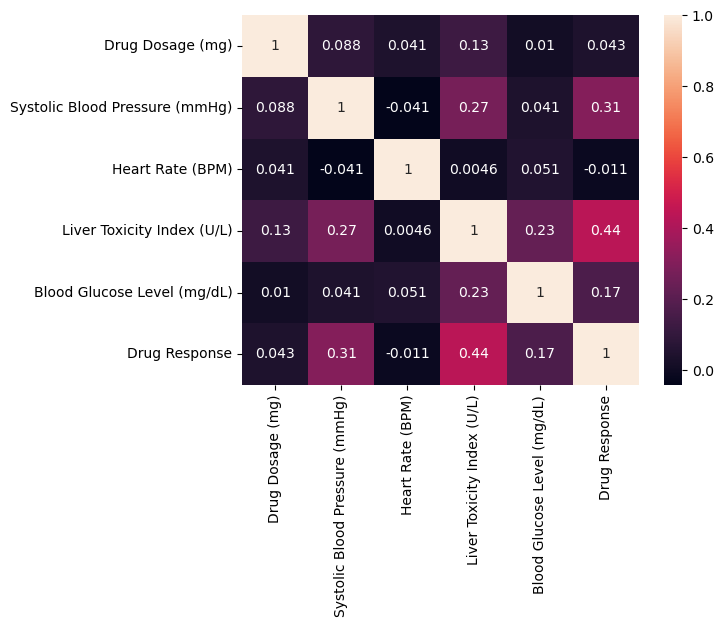

In [81]:
sns.heatmap(df.corr(), annot=True) #Check Correlations Between Features

##### Task 2: Data Preprocessing
- 1.	Encode categorical variables if necessary.

In [82]:
df.info() #info For Check Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


#### There Are No Categorical Features In This Dataset

- 2.	Split the dataset into training and testing sets.

In [83]:
x = df.drop(['Drug Response'], axis=1) #Split Data Into X and Y
y = df['Drug Response']

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #train_test_split

##### Task 3: Data Visualization
- 1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.


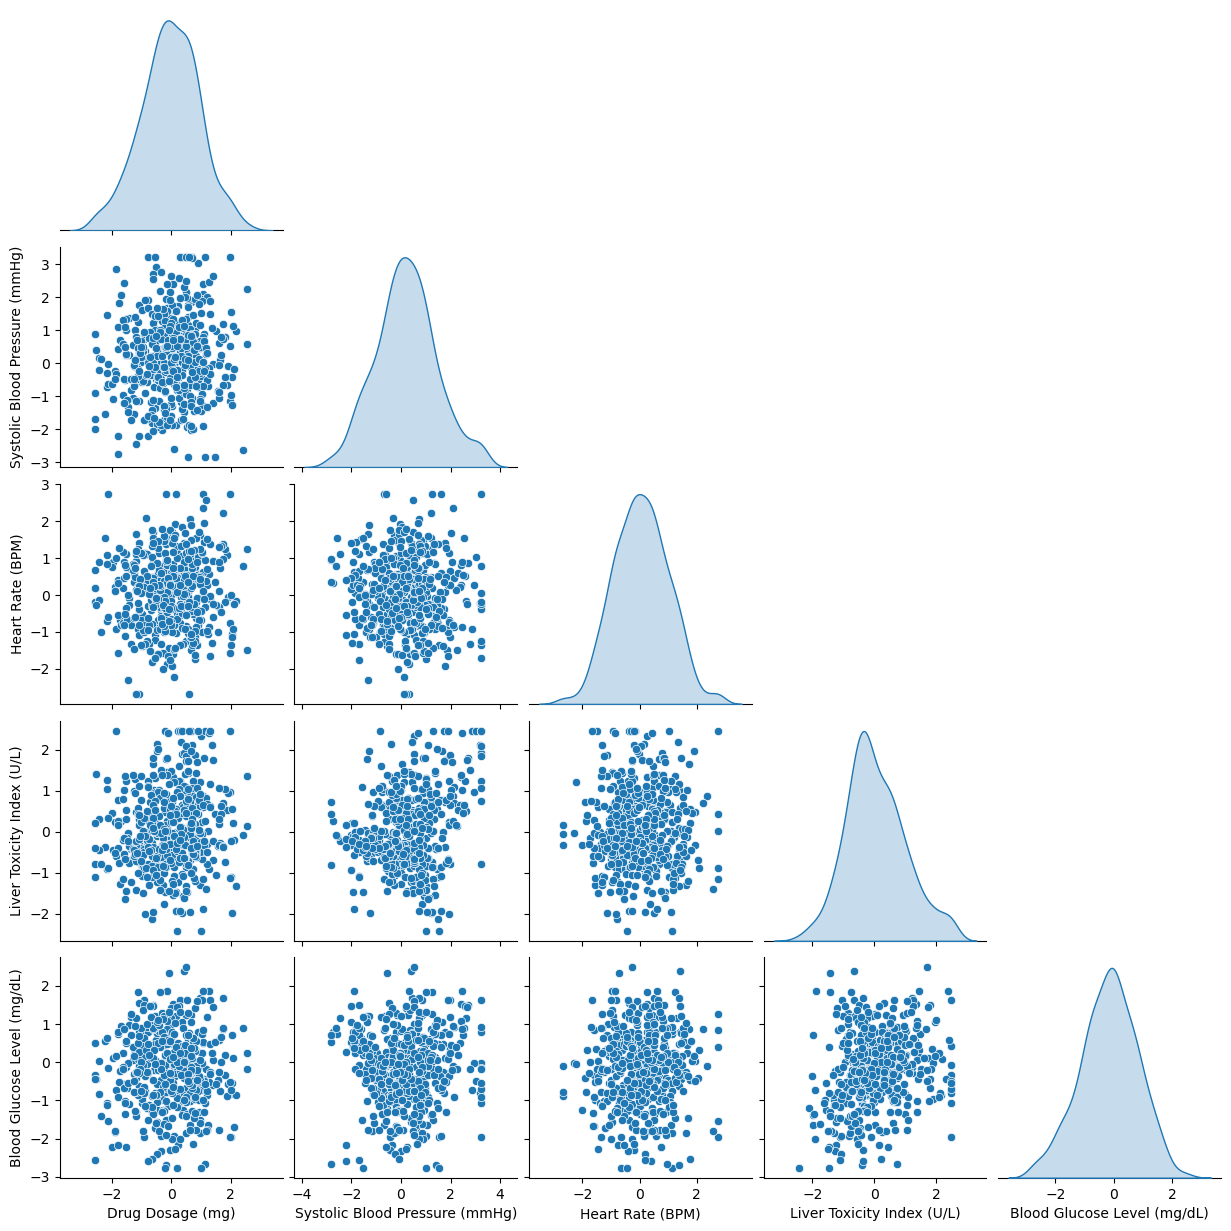

In [85]:
sns.pairplot(x, diag_kind = 'kde', corner = True) #PairPlot To comprehend feature distributions and relationships.
plt.show()

- 2.	Visualize class distributions to gauge dataset balance or imbalance.

<Axes: xlabel='Drug Response', ylabel='count'>

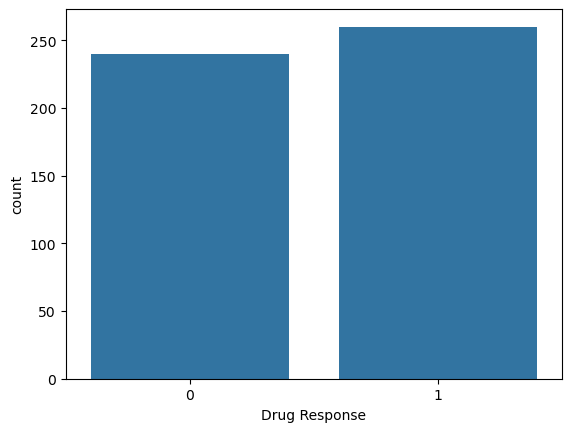

In [86]:
sns.countplot(x = y) #Count Plot For Check Dataset Is Balance Or Imbalance

##### Task 4: SVM Implementation
- 1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

In [87]:
from sklearn.svm import SVC #import Support Vector Classifier (Classification Problem)
svm = SVC()

- 2.	Train the SVM model on the training data.

In [88]:
model = svm.fit(x_train, y_train) #Train Model
y_pred = model.predict(x_test) #Make Predictions By Model

In [89]:
model.score(x_train, y_train) #Check Accuracy On Training Data

0.7925

In [90]:
model.score(x_test, y_test) #Check Accuracy On Testing Data

0.82

- 3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [91]:
from sklearn.metrics import classification_report , confusion_matrix, f1_score, recall_score, precision_score, roc_curve,roc_auc_score #import metrics

recall = recall_score(y_test, y_pred) #Calculate Recall Score
print("Recall:", np.round(recall,2))

precision = precision_score(y_test, y_pred) # Calculate precision
print("Precision:", np.round(precision,2))

f1 = f1_score(y_test, y_pred) # Calculate F1-score
print("F1-score:", np.round(f1,2))

auc_score = roc_auc_score(y_test, y_pred) # Calculate AUC Score
print(f"AUC Score : {auc_score}")

cm = confusion_matrix(y_test,y_pred) #For Cunfusion matrix
tn, fp, fn, tp = cm.ravel()

Recall: 0.8
Precision: 0.87
F1-score: 0.83
AUC Score : 0.8222402597402598


##### Task 5: Visualization of SVM Results
- 1.	Visualize classification results on the testing data.

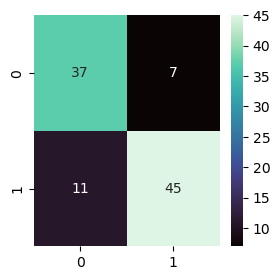

In [92]:
plt.figure(figsize=(3,3))
sns.heatmap(cm,
            cmap='mako',
            annot=True,
            fmt='d'
           ) #For Plot heatmap Of Confusion Matrix
plt.show()

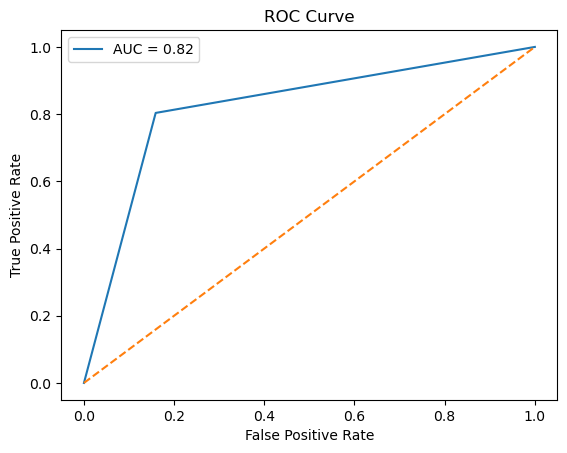

In [93]:
auc_score = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')  #For Plot AUC ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [94]:
print(classification_report(y_test, y_pred)) #Classification report

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        44
           1       0.87      0.80      0.83        56

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



##### Task 6: Parameter Tuning and Optimization
- 1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [95]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1,2,3,4],
    'gamma': ['scale', 'auto', 0.01, 0.001]
} #For Hyperparameter Tuning 

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
grid = GridSearchCV(SVC(), param_grid = param_grid) 

In [98]:
grid.fit(x_train, y_train) #Train with GridSearchCV

GridSearchCV(estimator=SVC(),
             param_grid={'degree': [1, 2, 3, 4],
                         'gamma': ['scale', 'auto', 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [99]:
print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_grid = best_model.predict(x_test) # Predict On GridSearchCV

recall = recall_score(y_test, y_pred_grid) 
print("Recall:", np.round(recall,2))

precision = precision_score(y_test, y_pred_grid) # Calculate precision
print("Precision:", np.round(precision,2))

f1 = f1_score(y_test, y_pred_grid) # Calculate F1-score
print("F1-score:", np.round(f1,2))

auc_score = roc_auc_score(y_test, y_pred_grid) # Calculate AUC-score
print(f"AUC Score : {auc_score}")

cm = confusion_matrix(y_test,y_pred_grid)
tn, fp, fn, tp = cm.ravel()

Best parameters: {'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Recall: 0.8
Precision: 0.87
F1-score: 0.83
AUC Score : 0.8222402597402598


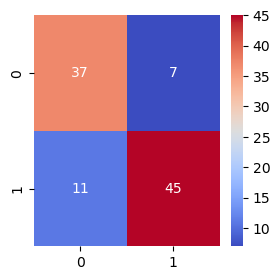

In [100]:
plt.figure(figsize=(3,3))
sns.heatmap(cm,
            cmap='coolwarm',
            annot=True,
            fmt='d'
           )
plt.show()

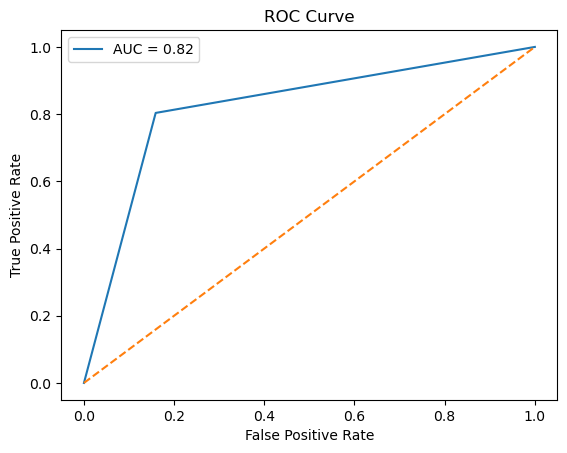

In [101]:
auc_score = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##### Task 7: Comparison and Analysis
#### 1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

##### Interpretation

| Kernel                          | Description                            | Pros                                   | Cons                         |
| ------------------------------- | -------------------------------------- | -------------------------------------- | ---------------------------- |
| Linear                          | Straight-line decision boundary        | Fast, best for linearly separable data | Poor on non-linear data      |
| Polynomial (poly)               | Curved boundary with polynomial degree | Handles more complex patterns          | Prone to overfitting, slower |
| RBF (radial basis function)     | Gaussian-based flexible boundary       | Great for non-linear data              | Needs tuning (`gamma`)       |

#### 2.	Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.

##### Strengths:
- Handles non-linear relationships effectively :
    - EDA and plots showed overlapping classes, where SVM with RBF kernel performed strongly.
- Effective in high-dimensional feature space :
    - The dataset contained multiple numerical features, and SVM managed them efficiently.
- Robust generalization :
    - Margin maximization reduced overfitting despite class overlap.
- Strong performance on imbalanced data :
    - Optimizing for F1-score and recall improved minority class prediction.
##### Weaknesses
- Highly sensitive to feature scaling :
    - Initial experiments showed convergence warnings, resolved only after applying StandardScaler.
- Computationally expensive :
    - GridSearchCV with RBF kernel significantly increased training time.
- Low interpretability :
    - Unlike linear models, SVM does not provide easily explainable feature importance.
- Hyperparameter dependent :
    - Model performance strongly relied on tuning C, gamma, and kernel choice.

#### 3.	Discuss practical implications of SVM in real-world classification tasks.

##### 1. High Accuracy in Complex Domains
- SVM is widely used in domains where precision is critical:
    - Medical diagnosis: e.g., classifying tumors as benign or malignant.
    - Text categorization: e.g., spam detection, sentiment analysis.
    - Image classification: e.g., handwriting or facial recognition.
##### 2. Effective in High-Dimensional Data
- SVM performs well in scenarios where the number of features is greater than the number of observations:
    - e.g., DNA microarray analysis, where each sample may have thousands of gene expression values.
##### 3. Versatile with Kernel Trick
- The kernel function enables SVM to handle non-linear data by mapping it to a higher-dimensional space:
    - Useful in scenarios where relationships between features are complex and non-linear (e.g., pattern recognition, fraud detection).
    - Common kernels: RBF, polynomial, sigmoid.
##### 4. Robust to Overfitting (Especially in High-Dimensional Space)
- SVM uses regularization (C parameter) to avoid overfitting. It's effective when:
    - You have clean, well-separated data.
    - The number of features is large, but not too noisy.
| Limitation                   | Real-World Impact                                 |
| ---------------------------- | ------------------------------------------------- |
| Slow with large datasets     | Not suitable for real-time or very large datasets |
| Sensitive to noise           | Outliers can affect the margin significantly      |
| Parameter tuning needed      | Requires effort to choose best C, gamma, kernel   |